<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/03_01_Deep_Learning_pour_la_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [11]:
training_labels.reshape((training_images.shape[0],1))


array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [15]:
training_images.ndim

3

In [16]:
labels = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

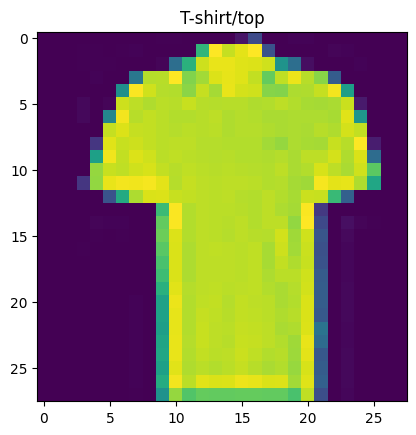

In [27]:
import matplotlib.pyplot as plt

plt.imshow(training_images[47725])
plt.title(labels[training_labels[47725]])
plt.show()

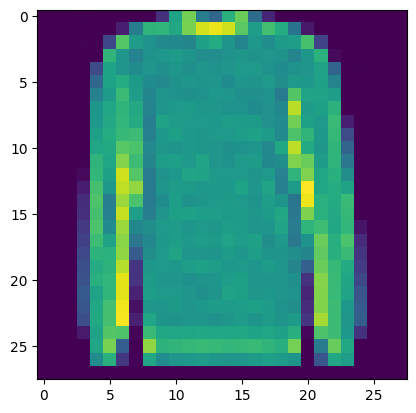

In [22]:
plt.imshow(training_images[45]/100)
plt.show()

# Flatten Images

Quitter des images carrés vers des vecteurs, par exemple si on a un dataset qui a 60 000 images de dimensions 28*28, on obtient un nouveau dataset qui aura 60 000 vecteurs et chaque vecteur aura une taille de 28*28 caractéristiques, ce qui revient à un tableau classique une peu comme un dataframe. On dit qu'on a flatten les images.

In [28]:
training_images.shape

(60000, 28, 28)

In [30]:
flat_training_images = training_images.reshape((60_000,28*28))
flat_test_images = test_images.reshape((-1,28*28))

In [32]:
flat_training_images.shape, flat_test_images.shape

((60000, 784), (10000, 784))

# One Hot Encoding

In [35]:
import numpy as np

x = np.array([1,2,1,0,3])

In [39]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [40]:
training_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [42]:
def softmax(vect):
  r = np.exp(np.array(vect))
  return r/sum(r)

In [44]:
softmax([6, 2])

array([0.98201379, 0.01798621])

# Premier modèle de Classification

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

On doit diviser par 255 pour éviter que lorsque le réseau s'entraine, il crée des pixels qui dépassent 255 (le max qu'un pixel peut avoir).

In [48]:
flat_training_images = flat_training_images/255.0
flat_test_images = flat_test_images/255.0

In [49]:
flat_training_images.min(), flat_training_images.max()

(0.0, 1.0)

In [51]:
model = Sequential([
    Dense(units = 784, activation = "sigmoid"),
    Dense(units = 10, activation = "softmax")
  ]
)

model.compile(loss = "mse", optimizer = SGD(learning_rate = .01), metrics = ["accuracy"])
h = model.fit(flat_training_images, training_labels, epochs = 5, validation_data=(flat_test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0887 - accuracy: 0.2509 - val_loss: 0.0863 - val_accuracy: 0.3508
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0841 - accuracy: 0.3691 - val_loss: 0.0819 - val_accuracy: 0.3881
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0794 - accuracy: 0.3990 - val_loss: 0.0769 - val_accuracy: 0.4155
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0744 - accuracy: 0.4569 - val_loss: 0.0720 - val_accuracy: 0.4947
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0696 - accuracy: 0.5341 - val_loss: 0.0674 - val_accuracy: 0.5811


# MSE VS Cross Entropy ou Log Loss

In [52]:
def mse(target, prediction):
  loss = (prediction - target) **2
  return loss

In [53]:
def log_loss(target, prediction):
  loss = -1 * np.log(prediction)
  return loss

In [55]:
prediction = np.arange(0, 1, 0.01)
len(prediction)

100

In [58]:
target = np.ones_like(prediction)
len(target)

100

In [59]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

<ipython-input-53-b2b06ae6f7e8>:2: RuntimeWarning: divide by zero encountered in log
  loss = -1 * np.log(prediction)


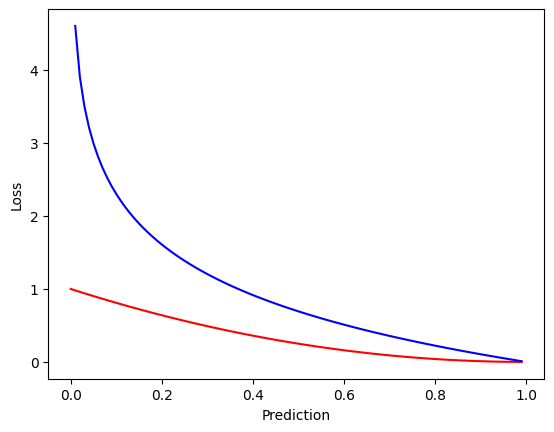

In [61]:
plt.plot(prediction, loss_mse, c= "red")
plt.plot(prediction, loss_ce, c= "blue")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.show()